In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv("placement.csv")

In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [8]:
df.shape

(100, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [10]:
df = df.iloc[:, 1:]

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [13]:
import matplotlib.pyplot as plt

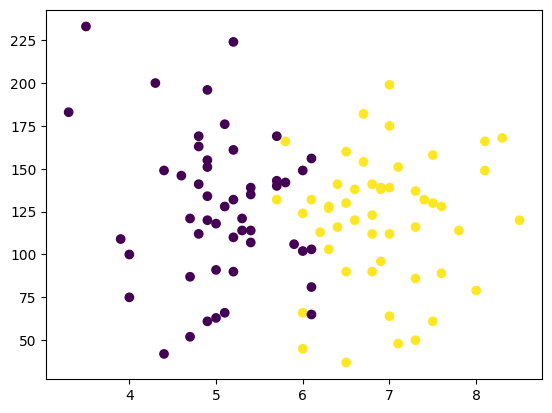

In [15]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])

In [16]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [17]:
X

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [18]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [19]:
y.shape

(100,)

In [101]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [102]:
X_train

,cgpa,iq
27,6.0,124
24,4.7,121
34,4.8,163
52,7.0,175
98,6.3,103
...,...,...
33,6.0,149
77,7.3,50
91,7.5,158
26,7.0,199


In [103]:
y_train

27    1
24    0
34    0
52    1
98    1
     ..
33    0
77    1
91    1
26    1
5     1
Name: placement, Length: 80, dtype: int64

In [104]:
X_test

,cgpa,iq
59,4.8,112
23,4.7,87
30,7.6,128
93,6.8,112
49,5.4,135
6,5.7,143
25,5.0,91
76,4.9,155
88,4.4,149
31,3.9,109


In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

In [107]:
X_train = scaler.fit_transform(X_train)

In [108]:
X_train

array([[-0.08822812, -0.03590885],
       [-1.27988062, -0.10833006],
       [-1.18821504,  0.90556692],
       [ 0.82842765,  1.19525177],
       [ 0.18676861, -0.54285734],
       [-1.18821504,  1.05040935],
       [ 0.82842765, -0.3255937 ],
       [ 0.27843419,  0.37447802],
       [ 0.37009977,  0.83314571],
       [-1.3715462 ,  0.49518005],
       [ 0.82842765, -1.48433312],
       [-1.09654947,  1.70220027],
       [ 0.6450965 , -0.06004926],
       [ 0.37009977, -0.8566826 ],
       [ 1.836749  ,  0.97798813],
       [ 1.28675554, -1.55675433],
       [-1.09654947, -0.13247047],
       [ 0.09510304, -0.3014533 ],
       [-0.36322485,  0.15721438],
       [ 1.19508996,  0.15721438],
       [-1.92153966, -1.21878867],
       [ 0.82842765,  0.32619721],
       [-0.82155273, -0.8566826 ],
       [ 0.73676208,  0.30205681],
       [ 0.55343092,  0.68830328],
       [-0.82155273, -0.37387451],
       [ 0.00343746,  0.73658409],
       [ 2.02008015,  1.02626894],
       [ 1.10342438,

In [109]:
X_test = scaler.transform(X_test)

In [110]:
X_test

array([[-1.18821504, -0.3255937 ],
       [-1.27988062, -0.92910382],
       [ 1.37842111,  0.06065277],
       [ 0.6450965 , -0.3255937 ],
       [-0.63822158,  0.2296356 ],
       [-0.36322485,  0.42275883],
       [-1.00488389, -0.8325422 ],
       [-1.09654947,  0.71244369],
       [-1.55487735,  0.56760126],
       [-2.01320524, -0.39801492],
       [ 0.46176534, -0.13247047],
       [ 1.10342438, -0.95324422],
       [-1.00488389, -0.18075128],
       [-1.00488389, -1.50847352],
       [-2.5631987 ,  1.38837501],
       [ 0.00343746, -1.07394624],
       [ 0.37009977,  0.10893357],
       [-0.63822158, -0.44629573],
       [-1.09654947, -1.55675433],
       [ 1.836749  ,  0.56760126]])

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
clf = LogisticRegression()

In [113]:
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [114]:
y_pred =clf.predict(X_test)

In [115]:
y_test

59    0
23    0
30    1
93    1
49    0
6     0
25    0
76    0
88    0
31    0
20    1
90    1
67    0
7     0
17    0
78    0
57    1
81    0
73    0
37    1
Name: placement, dtype: int64

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
a=accuracy_score(y_test,y_pred)

In [118]:
print(a)

0.95


In [119]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

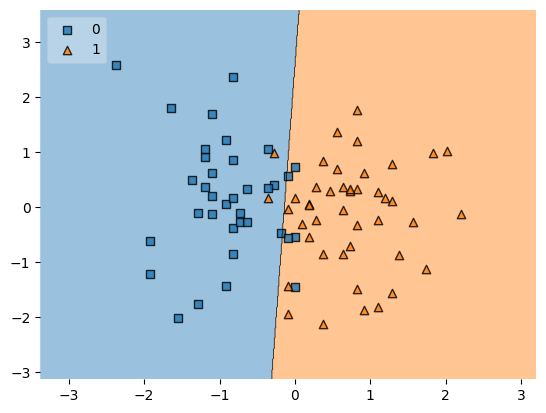

In [120]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [121]:
import pickle

In [122]:
pickle.dump(clf,open('model.pkl','wb'))